<a href="https://colab.research.google.com/github/zhi-yu-lin/data-and-python/blob/main/Project_3_Data_Exploration_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring data sets
---

This [link](https://docs.google.com/document/d/1cijDOCDixsYu-Rr9pC8STPPXado3xoFpgBAZgdDTLHs/edit?usp=sharing) will take you to a list of some of the datasets we use during the Programming for Data course.

For this exercise, please choose a dataset to work with.

Use the code cell below to play with the data.  Look at what data is included, where there is any null data, if there are any columns that need renaming, removing, new values calculated from them.

Form some ideas of what you might want to know from the data and use the techniques you have learned so far to show the answers to these.  You might do this by getting summary statistics, by sorting and showing parts of the dataset, by calculating new values, etc.

### What to do
---

Decide what you want to know, explain this in the TEXT cell below, then write some code to get the answer.  When you have done this, add a new text cell below the code cell, explain what you have found.  Then do the same again, adding text cell, code cell, text cell, for something else you would like to know.

# Import lib

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import requests

# Read the file

In [58]:
url = 'https://api.carbonintensity.org.uk/regional'
response = requests.get(url)
response.status_code

json_data = response.json()['data']
data_table = json_data[0]
df = pd.json_normalize(data_table['regions'])
df


,regionid,dnoregion,shortname,generationmix,intensity.forecast,intensity.index
0,1,Scottish Hydro Electric Power Distribution,North Scotland,"[{'fuel': 'biomass', 'perc': 0}, {'fuel': 'coa...",0,very low
1,2,SP Distribution,South Scotland,"[{'fuel': 'biomass', 'perc': 1.1}, {'fuel': 'c...",5,very low
2,3,Electricity North West,North West England,"[{'fuel': 'biomass', 'perc': 0.3}, {'fuel': 'c...",6,very low
3,4,NPG North East,North East England,"[{'fuel': 'biomass', 'perc': 0.4}, {'fuel': 'c...",3,very low
4,5,NPG Yorkshire,Yorkshire,"[{'fuel': 'biomass', 'perc': 14.9}, {'fuel': '...",48,low
5,6,SP Manweb,North Wales & Merseyside,"[{'fuel': 'biomass', 'perc': 0.4}, {'fuel': 'c...",22,very low
6,7,WPD South Wales,South Wales,"[{'fuel': 'biomass', 'perc': 0.7}, {'fuel': 'c...",30,very low
7,8,WPD West Midlands,West Midlands,"[{'fuel': 'biomass', 'perc': 1.4}, {'fuel': 'c...",31,very low
8,9,WPD East Midlands,East Midlands,"[{'fuel': 'biomass', 'perc': 7.6}, {'fuel': 'c...",134,moderate
9,10,UKPN East,East England,"[{'fuel': 'biomass', 'perc': 0}, {'fuel': 'coa...",1,very low


# Story



In [59]:
# Have a glance at the carbon intensity of each region and rank them. It is clear that North Scotland has the lowest carbon intensity and the East Midlands is the worst.

region_mean = df.groupby('shortname')[['intensity.forecast', 'intensity.index']].mean(). sort_values(by='intensity.forecast')
region_mean

<ipython-input-59-861d6093faab>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_mean = df.groupby('shortname')[['intensity.forecast', 'intensity.index']].mean(). sort_values(by='intensity.forecast')


,intensity.forecast
shortname,
North Scotland,0.0
East England,1.0
North East England,3.0
South Scotland,5.0
Scotland,5.0
North West England,6.0
North Wales & Merseyside,22.0
Wales,23.0
South Wales,30.0


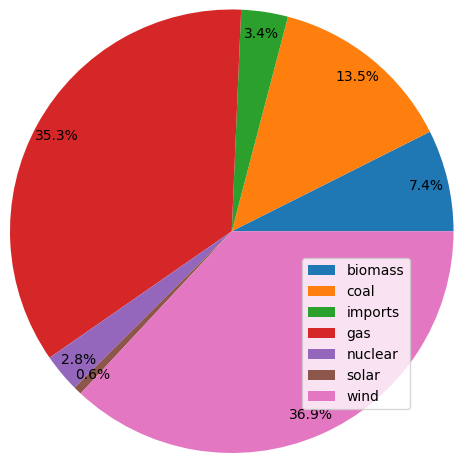

In [46]:
# Have a deeper insight into the East Midlands. We can find out the reasons why carbon intensity is so strong are gas takes laege proportion.

em_data = df['generationmix'].at[8]
labels = []
generationmix = []
for item in em_data:
  if item['perc'] != 0:
    labels.append(item['fuel'])
    generationmix.append(item['perc'])
plt.pie(generationmix, radius=1.5, pctdistance=0.9, autopct='%1.1f%%')
plt.legend(labels = labels, loc='lower right')
plt.show()

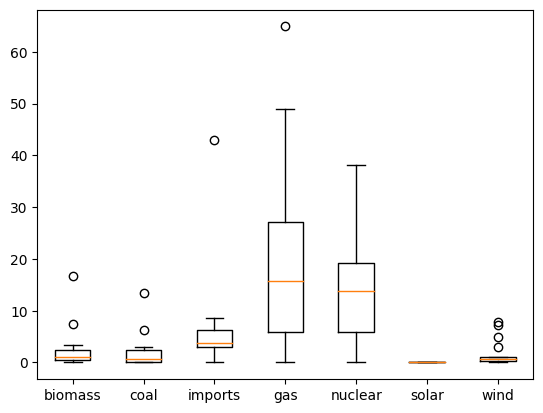

In [57]:
# To analyze the usage of each fuel, we can draw a Box Plot.
box_data = []
mix = []

for i in range(7):
  for j in range(18):
    row = df['generationmix'].at[j]
    item = row[i]
    mix.append(item['perc'])
  if len(mix) == 18:
    box_data.append(mix)
    mix = []

plt.boxplot(box_data, labels=labels)
plt.show()
